- 全結合層のノード数を減らす
- batch_sizeを500に変更

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io
from keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

labels= pd.read_csv("train_master.tsv", sep="\t")
master = pd.read_csv("label_master.tsv", sep="\t")
sample = pd.read_csv("sample_submit.csv", header=None, sep=",")

train_images = []
for fname in labels["file_name"]:
    path = "./train/" + fname
    img = io.imread(path)
    train_images.append(img)
train_images = np.array(train_images)
print(type(train_images), train_images.shape)

test_images = []
for fname in sample[0]:
    path = "./test/" + fname
    img = io.imread(path)
    test_images.append(img)
test_images = np.array(test_images )
print(type(test_images ), test_images.shape)

train_images = train_images / 255
test_images = test_images / 255

y = labels["label_id"]

y_categorical = utils.to_categorical(y)
y_categorical

X_con_image, X_ver_image = np.split(train_images, [40000])
y_con_label, y_ver_label = np.split(y_categorical, [40000])

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=100))
model.add(Activation("relu"))
model.add(Dense(units=50))
model.add(Activation("relu"))
model.add(Dense(units=20))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(lr=0.05),
              metrics=["accuracy"])

batch_size=500
epochs=20
              
history = model.fit(X_con_image, y_con_label,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_ver_image, y_ver_label))

KeyboardInterrupt: 

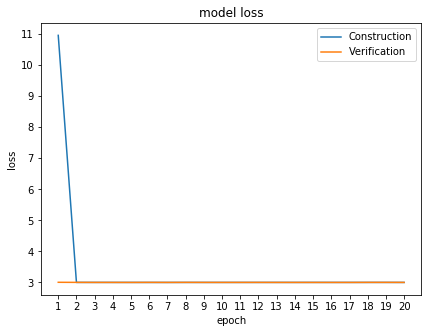

In [5]:
def learning_plot(history, epochs):
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(range(1,epochs+1), history.history['loss'])
    plt.plot(range(1,epochs+1), history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.xticks(range(1,epochs+1))
    plt.ylabel('loss')
    plt.legend(['Construction', 'Verification'], loc='upper right')
    plt.show()
    
learning_plot(history,epochs)

In [6]:
print(model.evaluate(X_ver_image ,y_ver_label  ))

10000/10000 [==============================] - 3s 252us/step
[2.9983172863006593, 0.0502999983727932]


In [7]:
pred = model.predict(test_images)

pred = pred.argmax(axis=1)
print(pred)

sample[1] = pred
sample.to_csv("submit5.csv", sep=",", index=None, header=None)

[15 15 15 ... 15 15 15]
